<a href="https://colab.research.google.com/github/Itsdheeraj814/mlthelast/blob/main/Untitled18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
Training Robot 1...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Fish: Silver Carp (Confidence: 99.97%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 

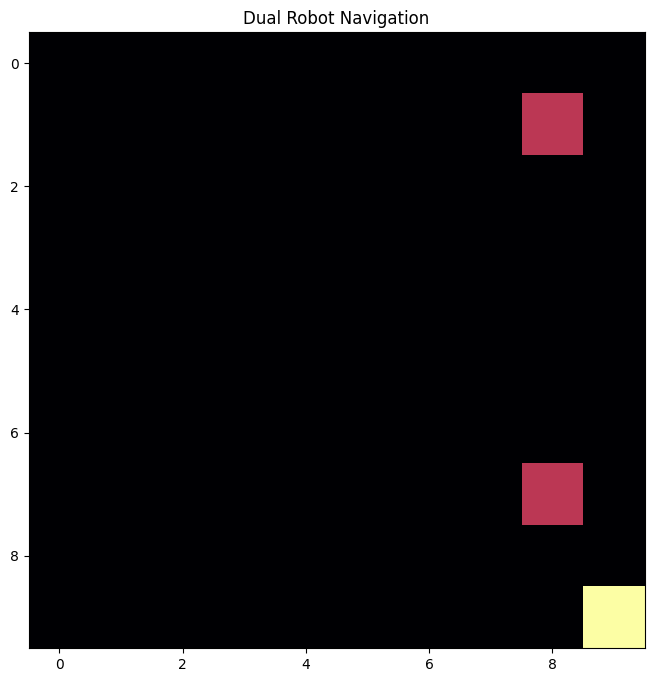

In [ ]:
# ===============================
# Import Libraries
# ===============================
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import os
from IPython.display import display
from PIL import Image

# ===============================
# Load Fish Classification Model
# ===============================
fish_model_path = '/content/drive/MyDrive/data/archive/FishImgDataset/fish_classifier_v4.keras'
fish_model = load_model(fish_model_path)

ResultMap = {
    0: "Bangus", 1: "Big Head Carp", 2: "Black Spotted Barb", 3: "Catfish",
    4: "Climbing Perch", 5: "Fourfinger Threadfin", 6: "Freshwater Eel",
    7: "Glass Perchlet", 8: "Goby", 9: "Gold Fish", 10: "Gourami",
    11: "Grass Carp", 12: "Green Spotted Puffer", 13: "Indian Carp",
    14: "Indo-Pacific Tarpon", 15: "Jaguar Gapote", 16: "Janitor Fish",
    17: "Knifefish", 18: "Long-Snouted Pipefish", 19: "Mosquito Fish",
    20: "Mudfish", 21: "Mullet", 22: "Pangasius", 23: "Perch",
    24: "Scat Fish", 25: "Silver Barb", 26: "Silver Carp", 27: "Silver Perch",
    28: "Snakehead", 29: "Tenpounder", 30: "Tilapia"
}

# ===============================
# Fish Classification Function
# ===============================
def classify_fish(image_path):
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = fish_model.predict(img_array)
    predicted_class = ResultMap[np.argmax(prediction)]
    confidence = np.max(prediction)
    print(f"Predicted Fish: {predicted_class} (Confidence: {confidence:.2%})")
    return predicted_class

# ===============================
# Environment Settings
# ===============================
GRID_SIZE = 10
ACTIONS = ["UP", "DOWN", "LEFT", "RIGHT"]
START_POS = (0, 0)
TARGET_POS = (GRID_SIZE-1, GRID_SIZE-1)

# Learning parameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0
epsilon_decay = 0.995
num_episodes = 1000
max_steps = 200

# Reward values
REWARD_TARGET = 10
REWARD_OBSTACLE = -10
REWARD_STEP = -1

# Initialize Q-tables for both robots
q_table_robot1 = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))
q_table_robot2 = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

# ===============================
# Obstacle Management
# ===============================
num_obstacles = 7
obstacles = set()

def generate_obstacles():
    global obstacles
    obstacles = set()
    while len(obstacles) < num_obstacles:
        pos = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
        if pos not in [START_POS, TARGET_POS]:
            fish_name = classify_fish("/content/drive/MyDrive/data/archive/FishImgDataset/test/Silver Carp/SilverCarp_105_jpg.rf.fe7308ed856065a6245dd34976991a44.jpg")
            obstacles.add((pos, fish_name))

def move_obstacles():
    global obstacles
    new_obstacles = set()
    for obs in obstacles:
        pos, fish_name = obs
        moves = [(0,0), (-1,0), (1,0), (0,-1), (0,1)]
        move = random.choice(moves)
        nr, nc = pos[0]+move[0], pos[1]+move[1]
        if 0 <= nr < GRID_SIZE and 0 <= nc < GRID_SIZE and (nr, nc) not in [START_POS, TARGET_POS]:
            new_obstacles.add(((nr, nc), fish_name))
        else:
            new_obstacles.add((pos, fish_name))
    obstacles = new_obstacles

# ===============================
# Helper Functions
# ===============================
def get_next_state(state, action):
    r, c = state
    if action == "UP" and r > 0: r -= 1
    elif action == "DOWN" and r < GRID_SIZE-1: r += 1
    elif action == "LEFT" and c > 0: c -= 1
    elif action == "RIGHT" and c < GRID_SIZE-1: c += 1
    return (r, c)

def get_reward(state):
    if state == TARGET_POS: return REWARD_TARGET
    if state in [obs[0] for obs in obstacles]: return REWARD_OBSTACLE
    return REWARD_STEP


def train_robot(q_table):
    original_epsilon = epsilon
    for episode in range(num_episodes):
        state = START_POS
        current_epsilon = max(0.01, original_epsilon * (epsilon_decay ** episode))

        for step in range(max_steps):
            if random.random() < current_epsilon:
                action_idx = random.randint(0, len(ACTIONS)-1)
            else:
                action_idx = np.argmax(q_table[state[0], state[1]])

            action = ACTIONS[action_idx]
            next_state = get_next_state(state, action)

            if next_state in [obs[0] for obs in obstacles]:
                reward = REWARD_OBSTACLE
                next_state = state
            else:
                reward = get_reward(next_state)

            # Q-table update
            best_next = np.argmax(q_table[next_state[0], next_state[1]])
            q_table[state[0], state[1], action_idx] = (1-learning_rate) * q_table[state[0], state[1], action_idx] + \
                learning_rate * (reward + discount_factor * q_table[next_state[0], next_state[1], best_next])

            state = next_state
            if state == TARGET_POS: break

        if episode % 50 == 0:
            move_obstacles()

    return q_table


generate_obstacles()
print("Training Robot 1...")
final_q_table_robot1 = train_robot(q_table_robot1)

# Train Robot 2 with new obstacles
generate_obstacles()
print("\nTraining Robot 2...")
final_q_table_robot2 = train_robot(q_table_robot2)


print("\n=== Robot 1 Q-table ===")
print(final_q_table_robot1)
print("\n=== Robot 2 Q-table ===")
print(final_q_table_robot2)


current_states = {
    "Robot1": START_POS,
    "Robot2": START_POS
}

# Accuracy tracking
total_steps = {"Robot1": 0, "Robot2": 0}
optimal_steps = {"Robot1": 0, "Robot2": 0}

fig, ax = plt.subplots(figsize=(8,8))
grid = np.zeros((GRID_SIZE, GRID_SIZE))

# ===============================
# Animation Functions
# ===============================
def init():
    ax.set_title("Dual Robot Navigation")
    ax.imshow(grid, cmap="inferno", vmin=0, vmax=1)
    return []

def update(frame):
    global current_states, obstacles, total_steps, optimal_steps

    # Move obstacles with 80% probability
    if random.random() < 0.8:
        move_obstacles()

    # Update both robots
    for robot in ["Robot1", "Robot2"]:
        current = current_states[robot]
        q_table = final_q_table_robot1 if robot == "Robot1" else final_q_table_robot2

        # Get Q-values and sort actions
        q_values = q_table[current[0], current[1]]
        sorted_actions = np.argsort(q_values)[::-1]

        # Find valid move
        next_state = current
        best_candidate = get_next_state(current, ACTIONS[sorted_actions[0]])
        best_available = best_candidate not in [obs[0] for obs in obstacles]

        for action_idx in sorted_actions:
            candidate = get_next_state(current, ACTIONS[action_idx])
            if candidate not in [obs[0] for obs in obstacles]:
                next_state = candidate
                break

        # Update accuracy counters
        total_steps[robot] += 1
        if best_available and next_state == best_candidate:
            optimal_steps[robot] += 1

        current_states[robot] = next_state

    # Update grid visualization
    grid[:] = 0.0
    # Draw obstacles with fish names
    for obs in obstacles:
        pos, name = obs
        grid[pos] = 0.5
        ax.text(pos[1], pos[0], name, color='white',
                ha='center', va='center', fontsize=8)
    # Draw robots
    grid[current_states["Robot1"]] = 0.2  # Blue for Robot1
    grid[current_states["Robot2"]] = 0.4  # Orange for Robot2
    # Draw target
    grid[TARGET_POS] = 1.0

    # Calculate accuracies
    acc1 = (optimal_steps["Robot1"]/total_steps["Robot1"])*100 if total_steps["Robot1"] > 0 else 0
    acc2 = (optimal_steps["Robot2"]/total_steps["Robot2"])*100 if total_steps["Robot2"] > 0 else 0

    # Update plot
    ax.clear()
    ax.imshow(grid, cmap="inferno", vmin=0, vmax=1)
    ax.set_title(f"Frame {frame}\nRobot1: {current_states['Robot1']} ({acc1:.1f}%)\nRobot2: {current_states['Robot2']} ({acc2:.1f}%)")

    # Stop condition
    if current_states["Robot1"] == TARGET_POS and current_states["Robot2"] == TARGET_POS:
        ani.event_source.stop()
        print("Both robots reached the target!")
        print(f"Final Accuracies:\nRobot1: {acc1:.1f}%\nRobot2: {acc2:.1f}%")

    return []

# ===============================
# Run Animation
# ===============================
ani = animation.FuncAnimation(fig, update, frames=200,
                              init_func=init, interval=500,
                              blit=False, repeat=False)

HTML(ani.to_jshtml())

HI How
